# Imports

In [49]:
import numpy      as np
import pandas     as pd
import seaborn    as sns
import umap.umap_ as umap

from plotly              import express   as px
from sklearn             import cluster   as c
from sklearn             import metrics   as m
from matplotlib          import pyplot    as plt
from IPython.display     import HTML
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## Helper Functions

In [3]:
def jupyter_settings():
#     %matplotlib inline
#     %pylab inline
#     %config InlineBackend.figure_format = 'retina'

    plt.style.use('ggplot')
    plt.rcParams['figure.figsize'] = [15, 7]
    plt.rcParams['font.size'] = 24

    display(HTML('<style>.container { width:100% !important; }</style>'))
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.options.display.float_format = '{:,.2f}'.format
    pd.set_option('display.expand_frame_repr', False)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.max_rows', None)

    sns.set()
    
jupyter_settings()

## Load Dataset

In [4]:
df_raw = pd.read_csv(r'../data/raw/ecommerce.csv')

In [5]:
df_raw.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Unnamed: 8
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,"17,850.00",United Kingdom,NaN
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,"17,850.00",United Kingdom,NaN
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,"17,850.00",United Kingdom,NaN
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,"17,850.00",United Kingdom,NaN
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,"17,850.00",United Kingdom,NaN


In [6]:
# drop 'unnamed: 8' column
df_raw = df_raw.drop(columns=['Unnamed: 8'], axis =1)

# Data Description

In [7]:
df1 = df_raw.copy()

## Rename Columns

In [8]:
df_raw.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
cols_new = ['invoice_no','stock_code','description','quantity','invoice_date','unit_price','customer_id','country']
df1.columns = cols_new
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,"17,850.00",United Kingdom


## Data Dimensions

In [10]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of cols: {}'.format(df1.shape[1]))

Number of rows: 541909
Number of cols: 8


## Data Types

In [11]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [12]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,"17,850.00",United Kingdom


## Check NA

In [13]:
df1.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

## Replace NA

In [14]:
# c0.1 - remove NA
df1 = df1.dropna(subset=['description','customer_id'])
print ('Removed data: {:.2f}'.format(1 - df1.shape[0]/df_raw.shape[0]))

Removed data: 0.25


In [15]:
df1.isna().sum()

invoice_no      0
stock_code      0
description     0
quantity        0
invoice_date    0
unit_price      0
customer_id     0
country         0
dtype: int64

## Change dtypes

In [16]:
df1.dtypes

invoice_no       object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [17]:
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,29-Nov-16,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,29-Nov-16,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,29-Nov-16,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,29-Nov-16,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,29-Nov-16,3.39,"17,850.00",United Kingdom


In [18]:
# changing 'invoice_date'
df1['invoice_date'] = pd.to_datetime (df1['invoice_date'], format='%d-%b-%y')
df1.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2016-11-29,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2016-11-29,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2016-11-29,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2016-11-29,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2016-11-29,3.39,"17,850.00",United Kingdom


In [19]:
# changing 'customer_id'
df1['customer_id'] = df1['customer_id'].astype(int)

In [20]:
df1.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id              int32
country                 object
dtype: object

## Descriptive Statistics

# Feature Engineering

In [21]:
df2 = df1.copy()

## Feature Creation

In [22]:
# df_ref = data reference
df_ref = df2.drop (['invoice_no','stock_code','description','quantity','invoice_date','unit_price','country'],
                   axis=1).drop_duplicates(ignore_index=True) # selecting 'customer_id' and droping duplicates
print('Data reference shape:', df_ref.shape)
df_ref.head()

Data reference shape: (4372, 1)


,customer_id
0,17850
1,13047
2,12583
3,13748
4,15100


In [23]:
# === MONETARY 

# creating 'gross revenue' (= quantity*price)
df2['gross_revenue'] = df2['quantity']*df2['unit_price']

# creating 'monetary'
df_monetary = df2[['customer_id','gross_revenue']].groupby('customer_id').sum().reset_index()

# merging dataframes
df_ref = pd.merge(df_ref, df_monetary, on='customer_id', how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

Checking NA: 

 customer_id      0
gross_revenue    0
dtype: int64 


Data reference shape: (4372, 2)


,customer_id,gross_revenue
0,17850,"5,288.63"
1,13047,"3,079.10"
2,12583,"7,187.34"
3,13748,948.25
4,15100,635.10


In [24]:
# === RECENCY (last day of purchase)
df_recency = df2[['customer_id','invoice_date']].groupby('customer_id').max().reset_index()
df_recency ['recency_days'] = (df2['invoice_date'].max() - df_recency['invoice_date']).dt.days # dt vectorize the series to apply 'days' command
df_recency = df_recency[['customer_id','recency_days']].copy()

# merging dataframes
df_ref = pd.merge(df_ref, df_recency, on='customer_id',how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

Checking NA: 

 customer_id      0
gross_revenue    0
recency_days     0
dtype: int64 


Data reference shape: (4372, 3)


,customer_id,gross_revenue,recency_days
0,17850,"5,288.63",302
1,13047,"3,079.10",31
2,12583,"7,187.34",2
3,13748,948.25,95
4,15100,635.10,330


In [25]:
# === FREQUENCY (purchase periodicity)
df_freq = df2[['customer_id','invoice_no']].drop_duplicates().groupby('customer_id').count().reset_index()
df_freq = df_freq.rename(columns={'customer_id': 'customer_id','invoice_no': 'invoice_freq'}) # changing columns names

# merging dataframes
df_ref = pd.merge(df_ref, df_freq, on='customer_id', how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

Checking NA: 

 customer_id      0
gross_revenue    0
recency_days     0
invoice_freq     0
dtype: int64 


Data reference shape: (4372, 4)


,customer_id,gross_revenue,recency_days,invoice_freq
0,17850,"5,288.63",302,35
1,13047,"3,079.10",31,18
2,12583,"7,187.34",2,18
3,13748,948.25,95,5
4,15100,635.10,330,6


In [26]:
# === AVG TICKET (how much is spend)
df_avgticket = df2[['customer_id','gross_revenue']].groupby('customer_id').mean().reset_index()
df_avgticket = df_avgticket.rename(columns={'gross_revenue':'avg_ticket'})

# merging dataframes
df_ref = pd.merge(df_ref, df_avgticket, on='customer_id', how='left')
print('Checking NA: \n\n', df_ref.isna().sum(),'\n\n')
print('Data reference shape:', df_ref.shape)
df_ref.head()

Checking NA: 

 customer_id      0
gross_revenue    0
recency_days     0
invoice_freq     0
avg_ticket       0
dtype: int64 


Data reference shape: (4372, 5)


,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket
0,17850,"5,288.63",302,35,16.95
1,13047,"3,079.10",31,18,15.71
2,12583,"7,187.34",2,18,28.63
3,13748,948.25,95,5,33.87
4,15100,635.10,330,6,105.85


# Variable Filtering

In [27]:
df3 = df_ref.copy()

# EDA (Exploratory Data Analysis)

In [28]:
df4 = df3.copy()

# Data Preparation

In [29]:
df5 = df4.copy()

# Feature Selection

In [30]:
df6 = df5.copy()

# Hypermarameter Fine-Tunning

In [31]:
df7 = df6.copy()
X =df7.drop(columns=['customer_id'])
X.head()

,gross_revenue,recency_days,invoice_freq,avg_ticket
0,"5,288.63",302,35,16.95
1,"3,079.10",31,18,15.71
2,"7,187.34",2,18,28.63
3,948.25,95,5,33.87
4,635.10,330,6,105.85


In [32]:
clusters = [2,3,4,5,6,7]

## Within-Cluster Sum of Square (WSS)

[100232042907.03981, 52900059994.704025, 40056254626.30003, 23025577424.446323, 20043264391.360943, 9944467002.2035]


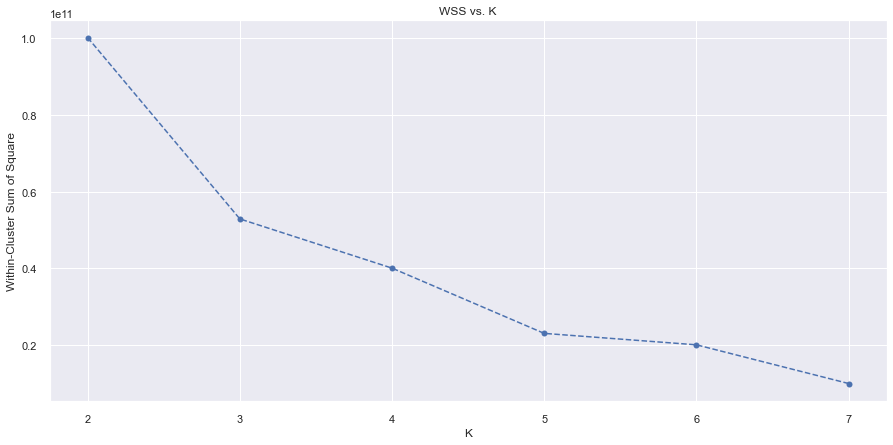

In [33]:
wss = []

for k in clusters:
    # model definition
    kmeans = c.KMeans (init='random', 
                       n_clusters=k, 
                       n_init=10, #init random inicia o centroide aleatoriamente, n_init 
                       max_iter = 300, 
                       random_state =42) # random state define um estado aleatório fixo
    
    # model training
    kmeans.fit( X )
    
    # validation
    wss.append(kmeans.inertia_) # generates a wss value for each k
    
# wss plot - elbow method
plt.plot (clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K')
plt.ylabel('Within-Cluster Sum of Square')
plt.title('WSS vs. K')

print(wss)

## Within-Cluster Sum of Square (WSS) vs. Silhouette Score

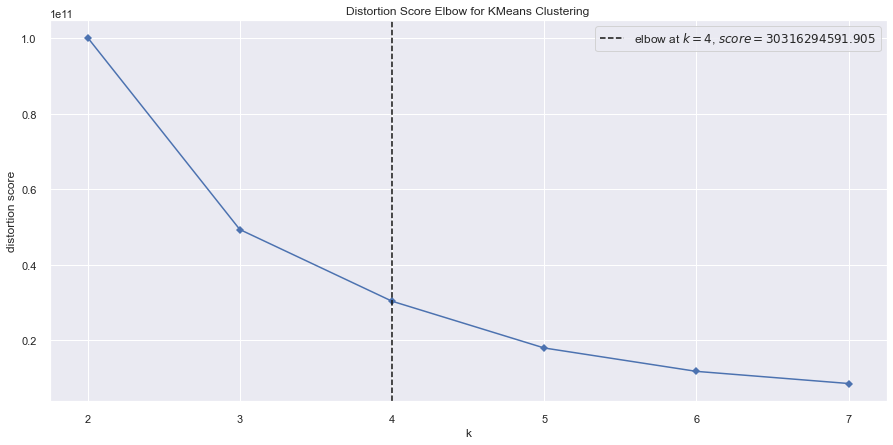

In [34]:
# yellow brick

kmeans_y= KElbowVisualizer(c.KMeans(), k=clusters, timings=False);
kmeans_y.fit(X);
kmeans_y.show();

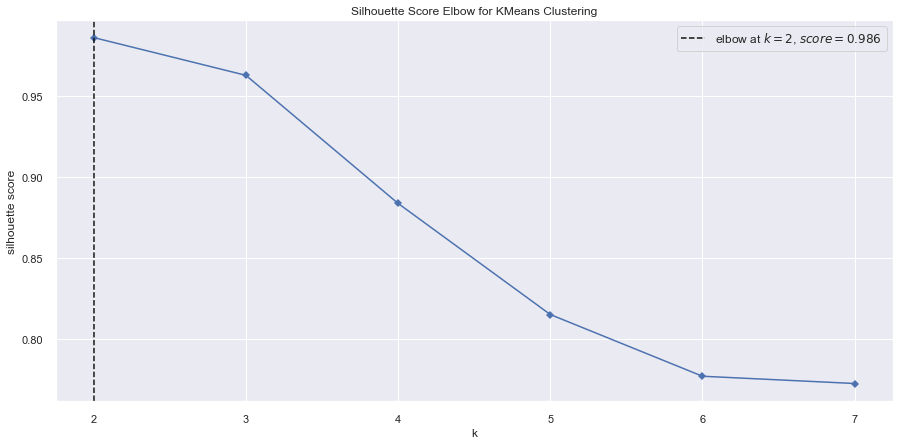

In [35]:
# yellow brick

kmeans_y= KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timings=False);
kmeans_y.fit(X);
kmeans_y.show();


## Silhouette Analysis

In [36]:
# divmod input parameters are numerator and denomitor
# divmod outputs are quotient and remainder
x,y=divmod(5,2)
print(x,y)

2 1


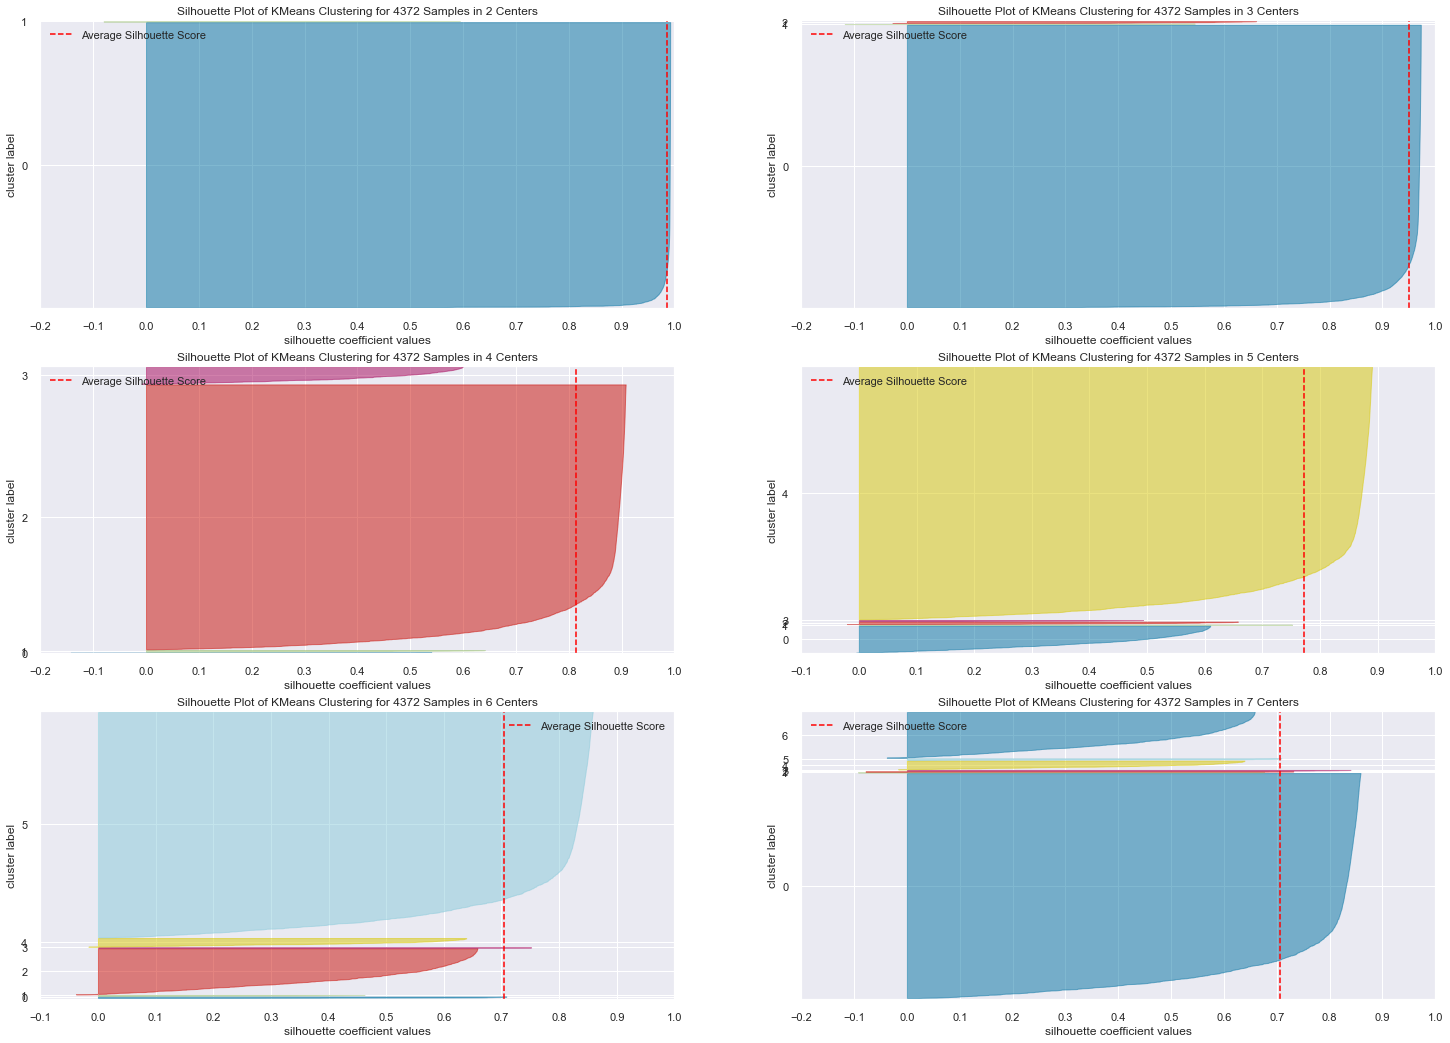

In [37]:
fig, ax = plt.subplots(3,2, figsize=(25,18))

for k in clusters:
    km = c.KMeans (n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42)
    q, r = divmod(k,2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick',ax=ax[q-1][r])
    visualizer.fit(X)
    visualizer.finalize()

# Model training

In [38]:
df8 = df7.copy()

## K-Means

In [39]:
# model definition
k = 4
kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

# model training
kmeans.fit(X)

# model clustering
# labels = kmeans.predict(X) # outra maneira de fazer
labels = kmeans.labels_
print(labels)

[0 1 0 ... 1 1 1]


## Cluster Validation

In [40]:
# WSS 
print('WSS value: {}'.format(kmeans.inertia_))

# SS 
print('SS value:  {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

WSS value: 40056254626.300026
SS value:  0.8139972028952442


# Cluster Analysis

In [41]:
df9 = df8.copy()
df9['cluster']=labels
df9.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket,cluster
0,17850,"5,288.63",302,35,16.95,0
1,13047,"3,079.10",31,18,15.71,1
2,12583,"7,187.34",2,18,28.63,0
3,13748,948.25,95,5,33.87,1
4,15100,635.10,330,6,105.85,1


## Visualization Inspection

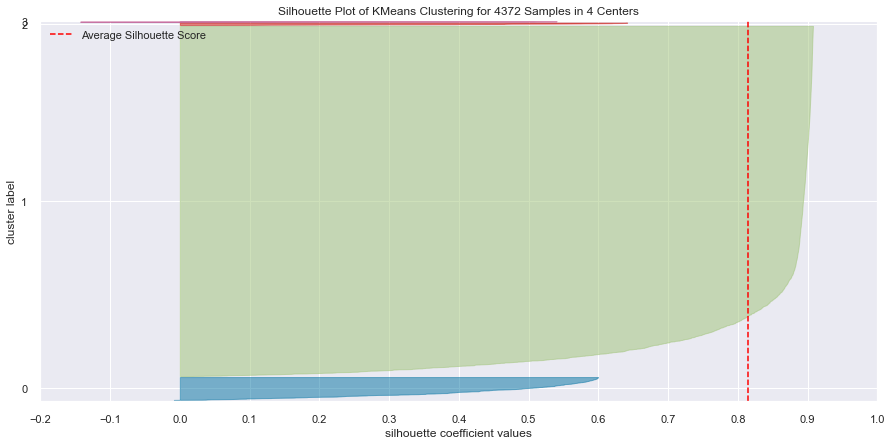

In [42]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()


## 2d Plot

In [43]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket,cluster
0,17850,"5,288.63",302,35,16.95,0
1,13047,"3,079.10",31,18,15.71,1
2,12583,"7,187.34",2,18,28.63,0
3,13748,948.25,95,5,33.87,1
4,15100,635.10,330,6,105.85,1


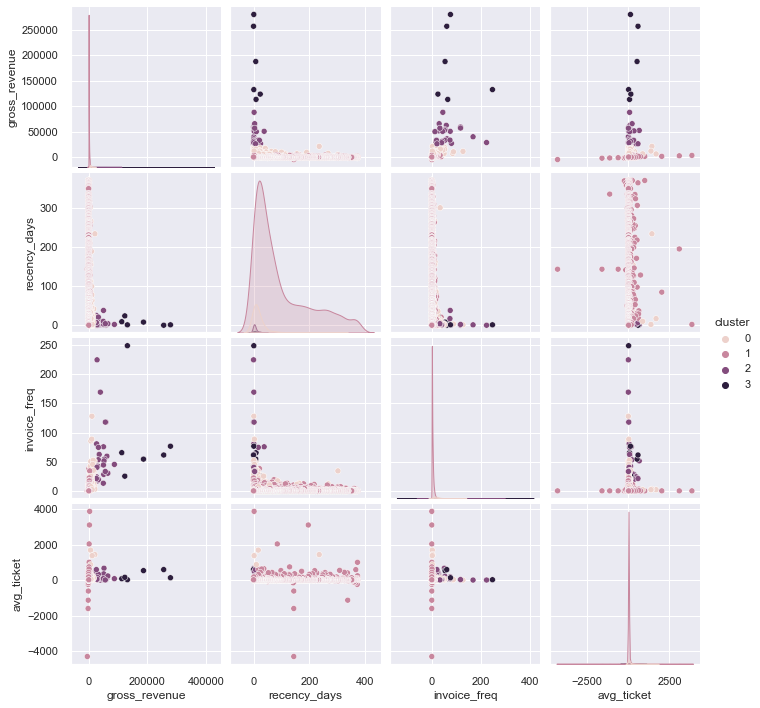

In [44]:
df_viz = df9.drop(columns='customer_id', axis=1)
sns.pairplot(df_viz, hue='cluster')

## UMAP

In [50]:
X.head()

,gross_revenue,recency_days,invoice_freq,avg_ticket
0,"5,288.63",302,35,16.95
1,"3,079.10",31,18,15.71
2,"7,187.34",2,18,28.63
3,948.25,95,5,33.87
4,635.10,330,6,105.85


In [59]:
reducer = umap.UMAP (n_neighbors=20, random_state=42) # n_neighbors = altera a visualização do cluster, meio que "zoom in/zoom out"
embedding = reducer.fit_transform(X)

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

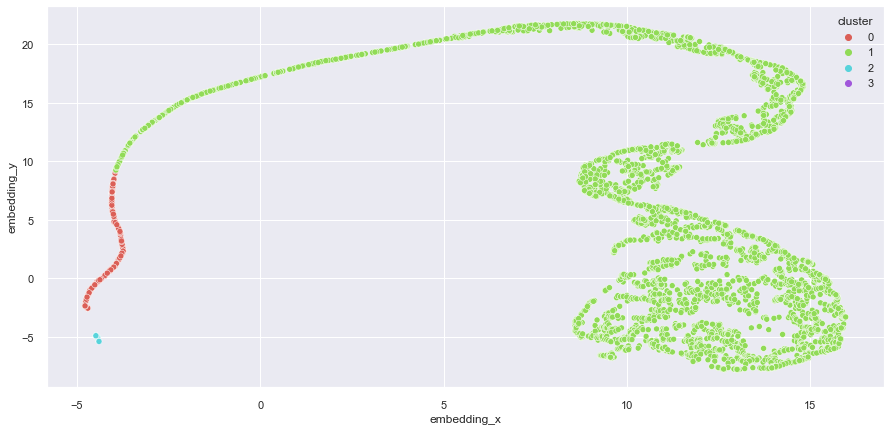

In [60]:
# embedding
df_viz['embedding_x'] = embedding[:,0]
df_viz['embedding_y'] = embedding[:,1]

# plot UMAP
sns.scatterplot(x='embedding_x', y='embedding_y',
                hue='cluster',
                palette=sns.color_palette('hls', n_colors=len(df_viz['cluster'].unique())),
                data=df_viz)

## Cluster Profile

In [61]:
df9.head()

,customer_id,gross_revenue,recency_days,invoice_freq,avg_ticket,cluster
0,17850,"5,288.63",302,35,16.95,0
1,13047,"3,079.10",31,18,15.71,1
2,12583,"7,187.34",2,18,28.63,0
3,13748,948.25,95,5,33.87,1
4,15100,635.10,330,6,105.85,1


In [63]:
# number of customers on each cluster
df_cluster = df9[['customer_id','cluster']].groupby('cluster').count().reset_index()
df_cluster['customer_percentage'] = (df_cluster['customer_id'] / df_cluster['customer_id'].sum())*100

# avg gross_revenue
df_avg_grossrevenue = df9[['gross_revenue','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_grossrevenue, how='inner', on='cluster')

# avg recency_days
df_avg_recencydays = df9[['recency_days','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recencydays, how='inner', on='cluster')

# avg incoive_freq
df_avg_invoicefreq = df9[['invoice_freq','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_invoicefreq, how='inner', on='cluster')

#avg ticket
df_avg_ticket = df9[['avg_ticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_ticket, how='inner', on='cluster')

df_cluster

,cluster,customer_id,customer_percentage,gross_revenue,recency_days,invoice_freq,avg_ticket
0,0,267,6.11,"8,089.03",20.28,19.53,62.78
1,1,4071,93.12,946.70,96.97,3.64,25.36
2,2,28,0.64,"42,614.39",6.18,57.82,162.86
3,3,6,0.14,"182,181.98",7.17,89.00,253.63


### Cluster 01:  ( Candidato à Insider ) ** ATUALIZAR **
    - Número de customers: 6 (0.14% do customers )
    - Recência em média: 7 dias
    - Compras em média: 89 compras
    - Receita em média: $182.182,00 dólares
        
### Cluster 02:
    - Número de customers: 31 (0.71% do customers )
    - Recência em média: 14 dias
    - Compras em média: 53 compras
    - Receita em média: $40.543,52 dólares

### Cluster 00:
    - Número de customers: 4.335 (99% do customers )
    - Recência em média: 92 dias
    - Compras em média: 5 compras
    - Receita em média: $1.372,57 dólares

# Deploy to Production